# Simple Linear Regression using Basic Python

In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Produce target and feature data

In [2]:
X = np.linspace(1,20,20)

# true function
y_true = 2*X + 5

# function with noise ('error term')
y_rand = 2*X + 5 + np.random.randint(-10, 11, len(X))

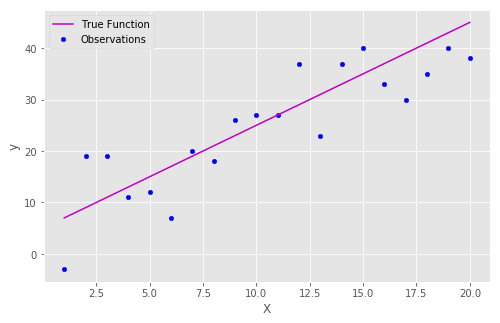

In [28]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(X, y_rand, color = 'b', s = 20, label = 'Observations') 
plt.plot(X, y_true, color='m', label='True Function')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## OLS

In [4]:
def simple_ols(X, y):
    '''Function to perform simple OLS regression using basic python

    Parameters:
    X - single feature np array or list
    y - target np array or list
    '''
    X_bar = np.mean(X)
    y_bar = np.mean(y)

    num_list = [(X[i] - X_bar) * (y[i] - y_bar) for i in range(len(X))]
    denom_list = [(X[i] - X_bar)**2 for i in range(len(X))]

    # slope
    b1 = sum(num_list) / sum(denom_list)

    # intercept
    b0 = y_bar - b1 * X_bar
    
    return b0, b1

In [5]:
b0, b1 = simple_ols(X, y_rand)
print('slope: ', b1)
print('intercept: ', b0)

slope:  1.7503759398496241
intercept:  6.421052631578949


In [6]:
y_est = b1*X + b0

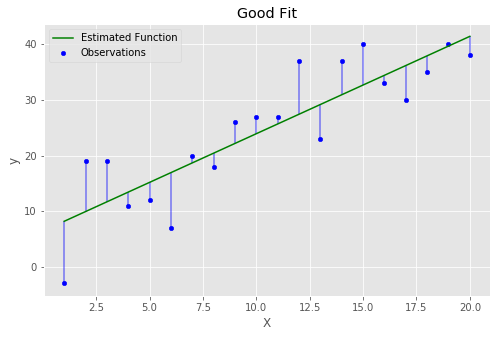

In [20]:
# plot residuals
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(X, y_rand, color = 'b', s = 20, label = 'Observations') 
plt.plot(X, y_est, color='g', label='Estimated Function')
plt.vlines(X,y_est,y_rand, color='b', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Good Fit')
plt.legend()
plt.show()

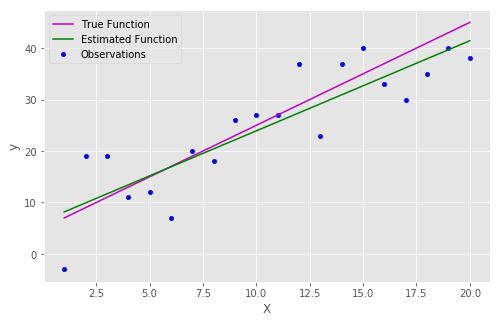

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(X, y_rand, color = 'b', s = 20, label = 'Observations') 
plt.plot(X, y_true, color='m', label='True Function')
plt.plot(X, y_est, color='g', label='Estimated Function')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Take 1000 Samples to Verify Estimates are Equal to True Values

In [9]:
samples = [ 2*X + 5 + np.random.randint(-10, 11, len(X)) for i in range(1000) ]

In [25]:
betas = [simple_ols(X, s) for s in samples ]

In [26]:
# mean of each column in list of betas
b0_sampled, b1_sampled = np.mean(betas, axis=0)

In [27]:
print('slope: ', b0_sampled)
print('intercept: ', b1_sampled)

slope:  5.011063157894742
intercept:  2.0014939849624045
